In [1]:
import pydot
import matplotlib.pyplot as plt
import time
import math
import random
from sklearn.manifold import MDS
import numpy as np
import plotly.graph_objs as go
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.manifold import Isomap

# Metrics TSNE

nodes [<pydot.core.Node object at 0x1661e5cd0>, <pydot.core.Node object at 0x1661e6790>, <pydot.core.Node object at 0x14e851c50>, <pydot.core.Node object at 0x167979ad0>, <pydot.core.Node object at 0x167978050>, <pydot.core.Node object at 0x14ee5ac50>, <pydot.core.Node object at 0x163278f90>, <pydot.core.Node object at 0x14d6763d0>, <pydot.core.Node object at 0x15d487110>, <pydot.core.Node object at 0x15a7a61d0>, <pydot.core.Node object at 0x14eb87990>, <pydot.core.Node object at 0x166f7b090>, <pydot.core.Node object at 0x162e49050>, <pydot.core.Node object at 0x155f5bd10>, <pydot.core.Node object at 0x15784ab50>, <pydot.core.Node object at 0x153520a90>, <pydot.core.Node object at 0x1535210d0>, <pydot.core.Node object at 0x15d4f5e90>, <pydot.core.Node object at 0x166287a50>, <pydot.core.Node object at 0x162d101d0>, <pydot.core.Node object at 0x162d11550>, <pydot.core.Node object at 0x15c403b90>, <pydot.core.Node object at 0x15a57d3d0>, <pydot.core.Node object at 0x14e4d3210>, <pydot.co

/var/folders/pp/bdyt1jrd5w5d3twfkg227dtc0000gn/T/ipykernel_41076/3389298344.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embeddings[:, 0], embeddings[:, 1], cmap='viridis', s=50)


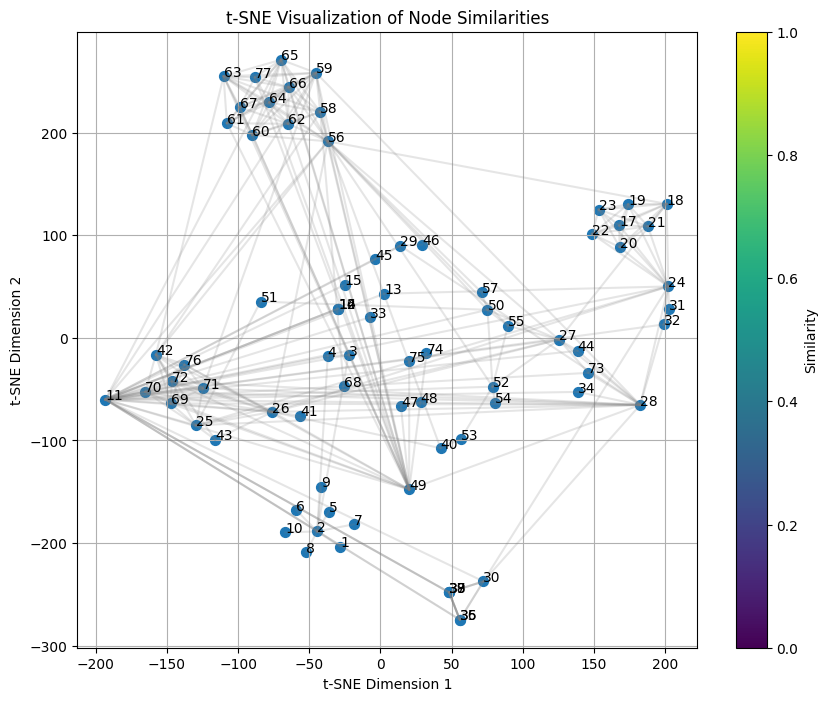

NameError: name 'labels' is not defined

NameError: name 'labels' is not defined

In [162]:
run 'Step6.ipynb'

# Miserables

In [124]:
nodes,edges,node_list,edge_list,weights = get_data_step6('Datasets/LesMiserables.dot')

In [164]:
def compute_similarity_matrix(node_list, edge_list, weights):
    edge_weights = {(u, v): weight for (u, v), weight in weights.items()}

    num_nodes = len(node_list)
    distances = np.zeros((num_nodes, num_nodes))
    for i, source in enumerate(node_list):
        for j, target in enumerate(node_list):
            if i != j:
                if (source, target) in edge_weights:
                    distances[i, j] = edge_weights[(source, target)]
                elif (target, source) in edge_weights:
                    distances[i, j] = edge_weights[(target, source)]
                else:
                    distances[i, j] = np.inf

    similarities = np.zeros((num_nodes, num_nodes))
    for u, v in edge_list:
        i = node_list.index(u)
        j = node_list.index(v)
        similarities[i, j] = 1 / (1 + distances[i, j])
        similarities[j, i] = similarities[i, j]  # Similarity matrix is symmetric

    np.fill_diagonal(similarities, 1) #diagonal 1

    return similarities

similarity_matrix = compute_similarity_matrix(node_list, edge_list, weights)

#print("Similarity matrix:")
#print("\t" + "\t".join(node_list))
#for i in range(len(node_list)):
#    print(node_list[i], "\t", end="")
#    for j in range(len(node_list)):
#        print("{:.2f}".format(similarity_matrix[i, j]), "\t", end="")
#    print()

similarities = compute_similarity_matrix(node_list, edge_list, weights)


Iteration 1: KL divergence = 0.4053000211715698
Iteration 2: KL divergence = 0.4053000211715698
Iteration 3: KL divergence = 0.4053000211715698
Iteration 4: KL divergence = 0.4053000211715698
Iteration 5: KL divergence = 0.4053000211715698
Iteration 6: KL divergence = 0.4053000211715698
Iteration 7: KL divergence = 0.4053000211715698
Iteration 8: KL divergence = 0.4053000211715698
Iteration 9: KL divergence = 0.4053000211715698
Iteration 10: KL divergence = 0.4053000211715698
Iteration 11: KL divergence = 0.4053000211715698
Iteration 12: KL divergence = 0.4053000211715698
Iteration 13: KL divergence = 0.4053000211715698
Iteration 14: KL divergence = 0.4053000211715698
Iteration 15: KL divergence = 0.4053000211715698
Iteration 16: KL divergence = 0.4053000211715698
Iteration 17: KL divergence = 0.4053000211715698
Iteration 18: KL divergence = 0.4053000211715698
Iteration 19: KL divergence = 0.4053000211715698
Iteration 20: KL divergence = 0.4053000211715698
Iteration 21: KL divergence =

/var/folders/pp/bdyt1jrd5w5d3twfkg227dtc0000gn/T/ipykernel_41076/3389298344.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embeddings[:, 0], embeddings[:, 1], cmap='viridis', s=50)


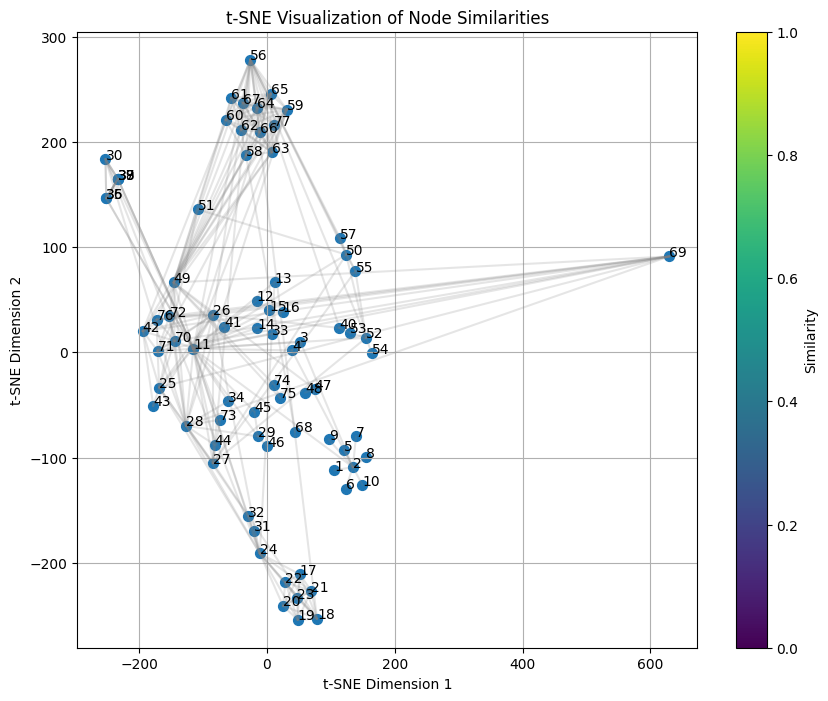

In [166]:
plot_tsne(similarities, node_list, edge_list, perplexity=10, learning_rate=250, n_iter=750, interactive=False)

# Jazz


In [167]:
nodes,edges,node_list,edge_list,weights = get_data_step6('Datasets/JazzNetwork.dot')

#print(nodes) 
#print(edges)
#print(node_list)
#print(edge_list)
#print(weights)

In [168]:
def compute_similarity_matrix(node_list, edge_list): #no wweights
    num_nodes = len(node_list)
    
    distances = np.full((num_nodes, num_nodes), np.inf)
    
    for u, v in edge_list:
        i = node_list.index(u)
        j = node_list.index(v)
        distances[i, j] = 1
        distances[j, i] = 1
    
    similarities = np.zeros((num_nodes, num_nodes))
    for i in range(num_nodes):
        for j in range(num_nodes):
            if i != j:
                similarities[i, j] = 1 / (1 + distances[i, j])
    
    np.fill_diagonal(similarities, 1)
    
    return similarities

similarities = compute_similarity_matrix(node_list, edge_list)

#print("Similarity matrix:")
#print("\t" + "\t".join(node_list))
#for i in range(len(node_list)):
#    print(node_list[i], "\t", end="")
#    for j in range(len(node_list)):
#        print("{:.2f}".format(similarities[i, j]), "\t", end="")
#    print()



Iteration 1: KL divergence = 0.38316023349761963
Iteration 2: KL divergence = 0.38316023349761963
Iteration 3: KL divergence = 0.38316023349761963
Iteration 4: KL divergence = 0.38316023349761963
Iteration 5: KL divergence = 0.38316023349761963
Iteration 6: KL divergence = 0.38316023349761963
Iteration 7: KL divergence = 0.38316023349761963
Iteration 8: KL divergence = 0.38316023349761963
Iteration 9: KL divergence = 0.38316023349761963
Iteration 10: KL divergence = 0.38316023349761963
Iteration 11: KL divergence = 0.38316023349761963
Iteration 12: KL divergence = 0.38316023349761963
Iteration 13: KL divergence = 0.38316023349761963
Iteration 14: KL divergence = 0.38316023349761963
Iteration 15: KL divergence = 0.38316023349761963
Iteration 16: KL divergence = 0.38316023349761963
Iteration 17: KL divergence = 0.38316023349761963
Iteration 18: KL divergence = 0.38316023349761963
Iteration 19: KL divergence = 0.38316023349761963
Iteration 20: KL divergence = 0.38316023349761963
Iteration

/var/folders/pp/bdyt1jrd5w5d3twfkg227dtc0000gn/T/ipykernel_41076/3389298344.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embeddings[:, 0], embeddings[:, 1], cmap='viridis', s=50)


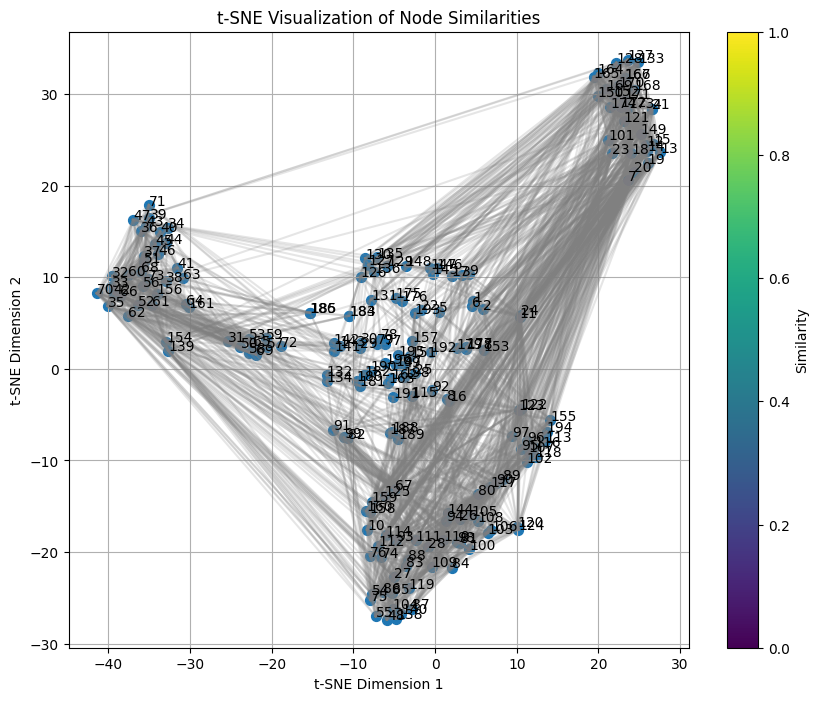

In [169]:
plot_tsne(similarities, node_list, edge_list, perplexity=15, learning_rate=250, n_iter=1500, interactive=False)

# League

In [170]:
nodes,edges,node_list,edge_list,weights = get_data_league('Datasets/LeagueNetwork.dot')

#print(nodes) 
#print(edges)
#print(node_list)
#print(edge_list)
#print(weights)

In [172]:
def compute_similarity_matrix_league(node_list, edge_list, weights):
    edge_weights = {(u, v): weight for (u, v), weight in weights.items()}

    num_nodes = len(node_list)
    distances = np.zeros((num_nodes, num_nodes))
    
    for i, source in enumerate(node_list):
        for j, target in enumerate(node_list):
            if i != j:
                if (source, target) in edge_weights:
                    distances[i, j] = edge_weights[(source, target)]
                else:
                    distances[i, j] = -edge_weights[(target, source)] if (target, source) in edge_weights else np.inf

    similarities = np.zeros((num_nodes, num_nodes))
    for u, v in edge_list:
        i = node_list.index(u)
        j = node_list.index(v)
        similarities[i, j] = 1 / (1 + abs(distances[i, j])) if distances[i, j] != np.inf else 0 
        similarities[j, i] = similarities[i, j]  

    np.fill_diagonal(similarities, 1)  # Diagonal set to 1

    return similarities

similarities = compute_similarity_matrix_league(node_list, edge_list, weights)

#print("Similarity matrix:")
#print("\t" + "\t".join(node_list))
#for i in range(len(node_list)):
#    print(node_list[i], "\t", end="")
#    for j in range(len(node_list)):
#        print("{:.2f}".format(similarities[i, j]), "\t", end="")
#    print()

Iteration 1: KL divergence = 0.23730000853538513
Iteration 2: KL divergence = 0.23730000853538513
Iteration 3: KL divergence = 0.23730000853538513
Iteration 4: KL divergence = 0.23730000853538513
Iteration 5: KL divergence = 0.23730000853538513
Iteration 6: KL divergence = 0.23730000853538513
Iteration 7: KL divergence = 0.23730000853538513
Iteration 8: KL divergence = 0.23730000853538513
Iteration 9: KL divergence = 0.23730000853538513
Iteration 10: KL divergence = 0.23730000853538513
Iteration 11: KL divergence = 0.23730000853538513
Iteration 12: KL divergence = 0.23730000853538513
Iteration 13: KL divergence = 0.23730000853538513
Iteration 14: KL divergence = 0.23730000853538513
Iteration 15: KL divergence = 0.23730000853538513
Iteration 16: KL divergence = 0.23730000853538513
Iteration 17: KL divergence = 0.23730000853538513
Iteration 18: KL divergence = 0.23730000853538513
Iteration 19: KL divergence = 0.23730000853538513
Iteration 20: KL divergence = 0.23730000853538513
Iteration

/var/folders/pp/bdyt1jrd5w5d3twfkg227dtc0000gn/T/ipykernel_41076/3389298344.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embeddings[:, 0], embeddings[:, 1], cmap='viridis', s=50)


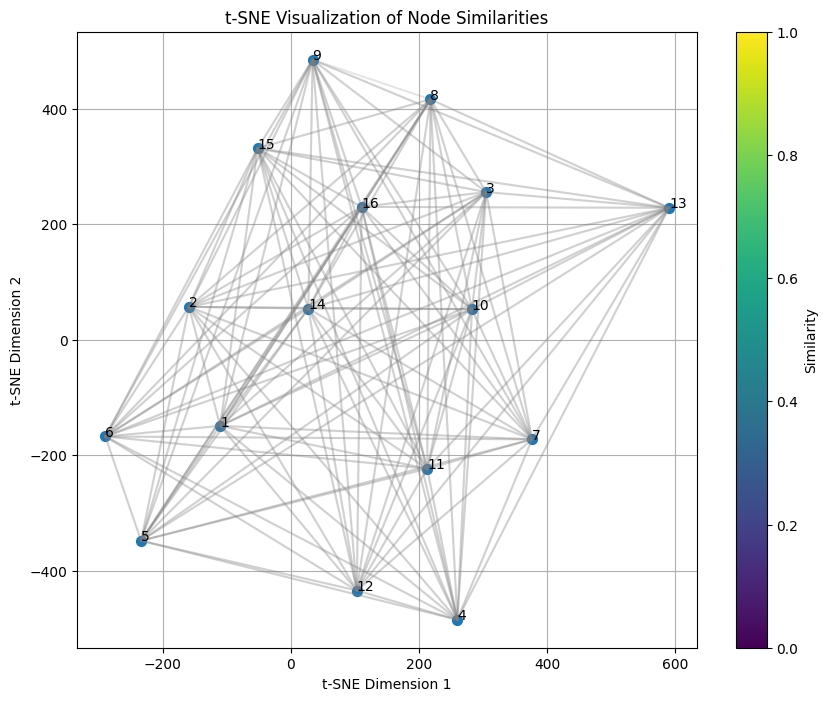

In [173]:
plot_tsne(similarities, node_list, edge_list, perplexity=10, learning_rate=200, n_iter=1000, interactive=False)

# Testing

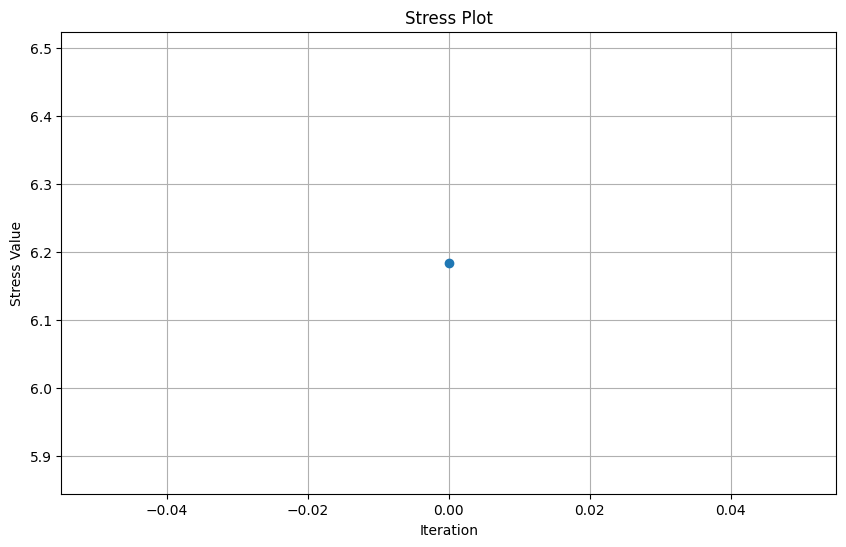

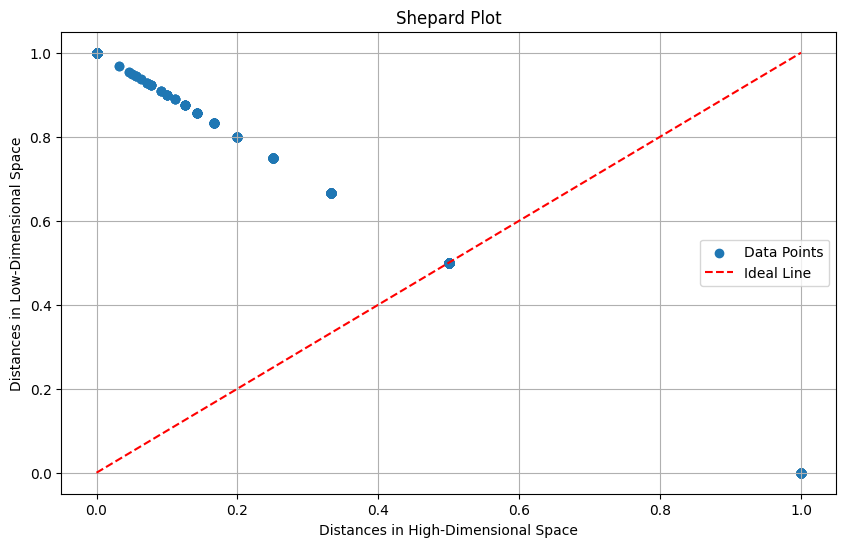

Continuity -29.923118011135056
Trustworthiness 0.6785714285714286
Stress 6.183878203609639


/var/folders/pp/bdyt1jrd5w5d3twfkg227dtc0000gn/T/ipykernel_41076/3047927058.py:153: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embeddings[:, 0], embeddings[:, 1], cmap='viridis', s=50)


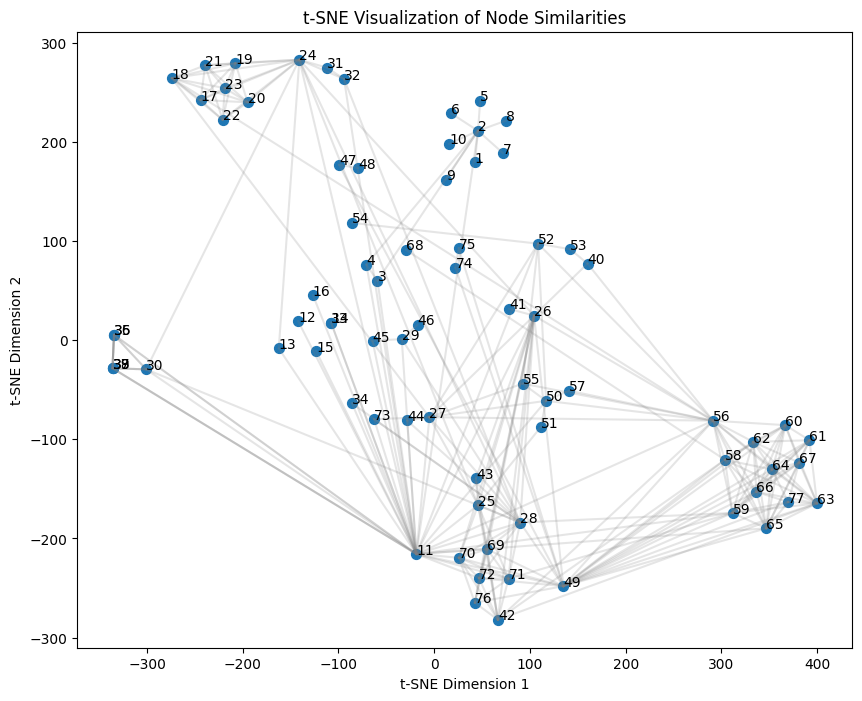

In [174]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def compute_continuity(X, Y, k=5):
    """
    Compute continuity metric for t-SNE projection.

    Parameters:
    - X: Original data points in high-dimensional space.
    - Y: t-SNE projected points in 2D space.
    - k: Number of neighbors to consider.

    Returns:
    - Continuity score.
    """
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='auto').fit(X)
    distances_X, _ = nbrs.kneighbors(X)

    nbrs = NearestNeighbors(n_neighbors=k, algorithm='auto').fit(Y)
    distances_Y, _ = nbrs.kneighbors(Y)

    continuity_score = 0
    for i in range(len(X)):
        for j in range(1, k):
            continuity_score += np.abs(distances_Y[i, j] - distances_X[i, j]) / distances_X[i, j]

    continuity_score /= (len(X) * (k - 1))
    
    return 1 - continuity_score

def compute_trustworthiness(X, Y, k=5):
    """
    Compute trustworthiness metric for t-SNE projection.

    Parameters:
    - X: Original data points in high-dimensional space.
    - Y: t-SNE projected points in 2D space.
    - k: Number of neighbors to consider.

    Returns:
    - Trustworthiness score.
    """
    #print(f"X: {X}")
    #print(f"Y: {Y}")
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='auto').fit(X)
    distances_X, indices_X = nbrs.kneighbors(X)

    nbrs = NearestNeighbors(n_neighbors=k, algorithm='auto').fit(Y)
    distances_Y, indices_Y = nbrs.kneighbors(Y)

    trustworthiness_score = 0
    for i in range(len(X)):
        for j in range(1, k):
            if indices_X[i, j] in indices_Y[i]:
                trustworthiness_score += 1

    trustworthiness_score /= (len(X) * (k - 1))

    return trustworthiness_score

def compute_stress(distances_highD, distances_lowD):
    
    #print(f"highD: {distances_highD}")
    #print(f"lowD: {distances_lowD}")
    n = len(distances_highD)
    stress = np.sqrt(np.sum((distances_highD - distances_lowD)**2)) / np.sqrt(np.sum(distances_highD**2))

    plt.figure(figsize=(10, 6))
    plt.plot(stress, marker='o', linestyle='-')
    plt.title('Stress Plot')
    plt.xlabel('Iteration')
    plt.ylabel('Stress Value')
    plt.grid(True)
    plt.show()

    return stress

def compute_shepard(distances_highD, distances_lowD):
    
    shepard_values = []
    for i in range(len(distances_highD)):
        shepard_values.append((distances_highD[i], distances_lowD[i]))

    plt.figure(figsize=(10, 6))
    plt.scatter(*zip(*shepard_values), label='Data Points')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Ideal Line')
    plt.title('Shepard Plot')
    plt.xlabel('Distances in High-Dimensional Space')
    plt.ylabel('Distances in Low-Dimensional Space')
    plt.grid(True)
    plt.legend()
    plt.show()

    return shepard_values

#def metric_pq_shepard_diagram_correlation(id_run, dataset_name):
#    global DISTANCES
#
#    D_high = np.load(DISTANCES['D_high_list'], mmap_mode='c')
#    D_low = np.load(DISTANCES[id_run]['D_low_list'], mmap_mode='c')
#
#    return stats.spearmanr(D_high, D_low)[0]

def compute_similarity_matrix(node_list, edge_list, weights):
    edge_weights = {(u, v): weight for (u, v), weight in weights.items()}

    num_nodes = len(node_list)
    distances = np.zeros((num_nodes, num_nodes))
    for i, source in enumerate(node_list):
        for j, target in enumerate(node_list):
            if i != j:
                if (source, target) in edge_weights:
                    distances[i, j] = edge_weights[(source, target)]
                elif (target, source) in edge_weights:
                    distances[i, j] = edge_weights[(target, source)]
                else:
                    distances[i, j] = np.inf

    similarities = np.zeros((num_nodes, num_nodes))
    for u, v in edge_list:
        i = node_list.index(u)
        j = node_list.index(v)
        similarities[i, j] = 1 / (1 + distances[i, j])
        similarities[j, i] = similarities[i, j]

    np.fill_diagonal(similarities, 1)

    return similarities

def plot_tsne_testing(similarities, node_list, edge_list, perplexity=10, learning_rate=300, n_iter=750):
    tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate=learning_rate, n_iter=n_iter, init='pca')
    embeddings = tsne.fit_transform(1 - similarities)

    #kl_div = tsne.kl_divergence_
    #for i in range(n_iter):
    #    print(f"Iteration {i+1}: KL divergence = {kl_div}")
    #    if kl_div < 0.05:
    #        print(f"t-SNE has converged in iteration n. {i+1}")
    #        break

    continuity_score = compute_continuity(1 - similarities, embeddings)
    trustworthiness_score = compute_trustworthiness(1 - similarities, embeddings)
    stress = compute_stress(similarities, 1 - similarities)
    shepard_values = compute_shepard(similarities, 1 - similarities)

    print(f"Continuity {continuity_score}")
    print(f"Trustworthiness {trustworthiness_score}")
    print(f"Stress {stress}")

    plt.figure(figsize=(10, 8))
    plt.scatter(embeddings[:, 0], embeddings[:, 1], cmap='viridis', s=50)

    for edge in edge_list:
        u, v = edge
        u_index = node_list.index(u)
        v_index = node_list.index(v)
        plt.plot([embeddings[u_index, 0], embeddings[v_index, 0]], 
                 [embeddings[u_index, 1], embeddings[v_index, 1]], 
                 color='gray', alpha=0.2)

    for i, node_number in enumerate(node_list):
        plt.text(embeddings[i, 0], embeddings[i, 1], node_number, color='black')

    plt.title('t-SNE Visualization of Node Similarities')
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    #plt.grid(True)
    #plt.colorbar(label='Similarity')
    plt.show()

nodes, edges, node_list, edge_list, weights = get_data_step6('Datasets/LesMiserables.dot')
similarities = compute_similarity_matrix(node_list, edge_list, weights)
plot_tsne_testing(similarities, node_list, edge_list, perplexity=10,learning_rate=250, n_iter=1000)
